# Python程序设计——上机7

**姓名：李书宇&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;学号：U202440940**

实验主题：网络数据爬取与解析

实验目的：

* 掌握爬虫的基本构成
* 基于urllib爬取网络数据
* 基于BeautifulSoup解析数据

<font color="red">请发送至：teacher_jin_2\@163.com，邮件标题和附件标题均为：Python程序设计_学号\_姓名\_上机7</font>

<b>实验内容：</b><br>
&nbsp;&nbsp;&nbsp;&nbsp;北科新闻网会定期发布北科大各单位的信息，为了分析各单位发表新闻的数量、时间、点击率等信息，需要爬取所有新闻网页，如图所示，并解析新闻标题、来源、发布时间的信息。<br>
&nbsp;&nbsp;&nbsp;&nbsp;为了获得新闻详情页的内容，需要首先抓取新闻列表页，通过新闻列表页获取新闻详情页的URL地址，然后基于获取的详情页地址抓取详情页内容，通过使用BeautifulSoup模块解析相关内容<br><br>
&nbsp;&nbsp;&nbsp;&nbsp;<font color="red"><b>若北科大新闻网无法抓取，可以选择别的新闻网站进行爬取</b></font>

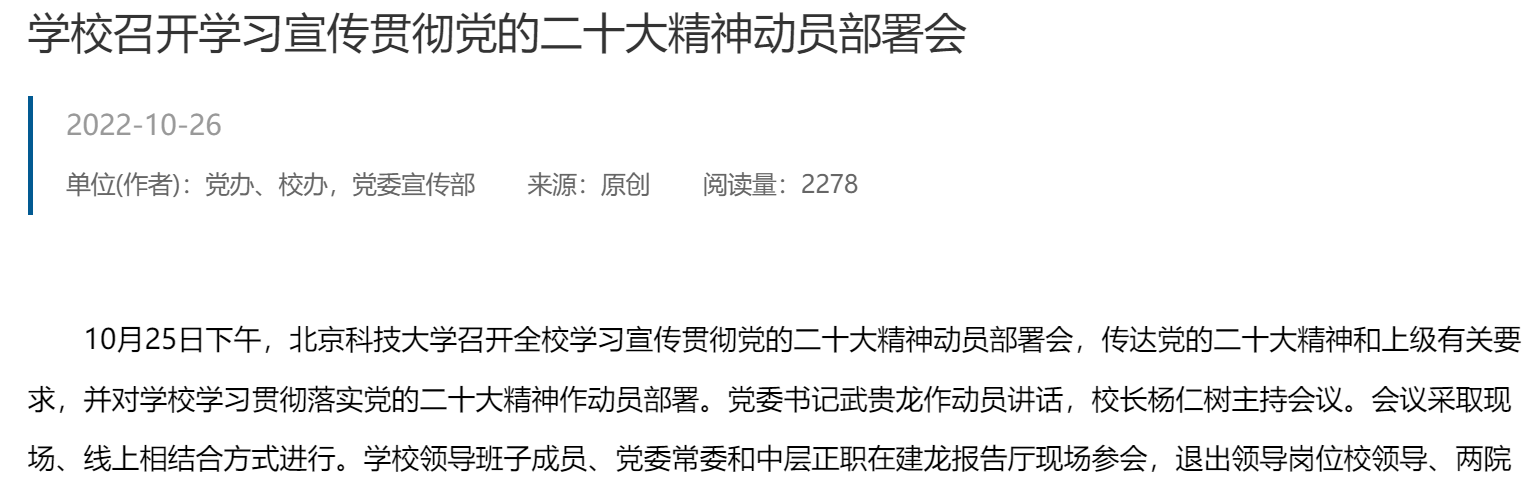

### 第一步：抓取列表页抓取和解析
#### 1、构造新闻列表页地址

In [16]:
import os
#创建文件夹. 否则 会报FileNotFoundError
if not os.path.exists(".\\ustbNews"):
    os.makedirs(".\\ustbNews")

#将新闻详情页地址放到文件listPageUrls中
with open(".\\ustbNews\\listPageUrls","w",encoding="utf-8") as file:
    for i in range(1304):
        if i==0:
            file.write("https://news.ustb.edu.cn/bkzx/xwdd.htm")
        else:
            file.write("https://news.ustb.edu.cn/bkzx/xwdd/{0}.htm".format(1304-i))
        file.write("\n")
        if i==10:
            break;

#### 2、爬取新闻列表页

In [17]:
# 首先从文件listPageUrls中读取所有的地址，放入到列表中
listUrls =[] #用于保存列表页地址，show me you code
with open(".\\ustbNews\\listPageUrls","r",encoding="utf-8") as file:
    urls = file.readlines()
    for url in urls:
        url = url.replace("\n","")
        listUrls.append(url)

#逐个抓取列表中的详情页，并将详情页保存到本地文件
from urllib import request
import time
try:
    i = 1
    for url in listUrls:
        time.sleep(0.5) #一定要加
        with request.urlopen(url) as html:
            if html.status==200:
                if not os.path.exists(".\\ustbNews\\listPage"):
                    os.makedirs(".\\ustbNews\\listPage")

                with open(".\\ustbNews\\listPage\\"+str(i),"w",encoding="utf-8") as file:
                    file.write(html.read().decode("utf-8"))
                i=i+1
                print("成功了："+url)
            else:
                print("出错了:"+url)
except Exception as e:
    print("抓取异常："+url+e)

成功了：https://news.ustb.edu.cn/bkzx/xwdd.htm
成功了：https://news.ustb.edu.cn/bkzx/xwdd/1303.htm
成功了：https://news.ustb.edu.cn/bkzx/xwdd/1302.htm
成功了：https://news.ustb.edu.cn/bkzx/xwdd/1301.htm
成功了：https://news.ustb.edu.cn/bkzx/xwdd/1300.htm
成功了：https://news.ustb.edu.cn/bkzx/xwdd/1299.htm
成功了：https://news.ustb.edu.cn/bkzx/xwdd/1298.htm
成功了：https://news.ustb.edu.cn/bkzx/xwdd/1297.htm
成功了：https://news.ustb.edu.cn/bkzx/xwdd/1296.htm
成功了：https://news.ustb.edu.cn/bkzx/xwdd/1295.htm
成功了：https://news.ustb.edu.cn/bkzx/xwdd/1294.htm


#### 3、解析新闻详情页，得到新闻列表页地址

In [18]:
#代码
#解析网页
from bs4 import BeautifulSoup

files = os.listdir(".\\ustbNews\\listPage")

detailFile = open(".\\ustbNews\\detailUrls","w",encoding="utf-8")

for file in files:
    with open(".\\ustbNews\\listPage\\"+file,"r",encoding="utf-8") as tmp:
        soup = BeautifulSoup(tmp,"lxml",from_encoding="utf-8")
        ul = soup.find("ul",class_="ul-listls2")
        lis = ul.find_all("li")
        for li in lis:
            link = li.find("a")
            href = link["href"]
            print(href)
            detailFile.write(href)
            detailFile.write("\n")
detailFile.close()

../info/1087/70179.htm
../info/1087/70177.htm
../info/1087/70145.htm
../info/1087/70142.htm
../info/1087/70095.htm
../info/1087/70166.htm
../info/1087/70073.htm
../info/1087/70072.htm
../../info/1087/57261.htm
../../info/1087/57283.htm
../../info/1087/57277.htm
../../info/1087/57273.htm
../../info/1087/57269.htm
../../info/1087/57266.htm
../../info/1087/57264.htm
../../info/1087/57247.htm
../../info/1087/57586.htm
../../info/1087/57610.htm
../../info/1087/57600.htm
../../info/1087/57597.htm
../../info/1087/57594.htm
../../info/1087/57705.htm
../../info/1087/57584.htm
../../info/1087/57577.htm
../../info/1087/57574.htm
../../info/1087/57580.htm
../../info/1087/57176.htm
../../info/1087/57567.htm
../../info/1087/57572.htm
../../info/1087/57570.htm
../../info/1087/57564.htm
../../info/1087/57290.htm
../../info/1087/57586.htm
../../info/1087/57610.htm
../../info/1087/57600.htm
../../info/1087/57597.htm
../../info/1087/57594.htm
../../info/1087/57705.htm
../../info/1087/57584.htm
../../info

### 第二步：新闻详情页的抓取和解析
#### 1、页面抓取，并将抓取的页面保存到文件夹中

In [ ]:
# show me you code
if not os.path.exists("./ustbNews/detailPages"):
    os.makedirs("./ustbNews/detailPages")

with open("./ustbNews/detailUrls", "r") as detailUrls:
    for line in detailUrls.readlines():
        line = line.strip()
        ls = line.split("/")
        url = "https://news.ustb.edu.cn/info/1087/"+ls[-1] # 所有的新闻详情页都是"https://news.ustb.edu.cn/info/1087/xxxxx.htm"格式

        try:
            with request.urlopen(url=url) as html:
                if html.status==200:
                    with open("./ustbNews/detailPages/"+ls[-1], "w", encoding="utf-8") as file:
                        file.write(html.read().decode("utf-8"))
                    print("抓取成功: {}".format(line))
        except Exception as e:
            print("抓取异常: {},{}".format(line, e))

        time.sleep(0.5)

抓取成功: ../info/1087/70179.htm
抓取成功: ../info/1087/70177.htm
抓取成功: ../info/1087/70145.htm
抓取成功: ../info/1087/70142.htm
抓取成功: ../info/1087/70095.htm
抓取成功: ../info/1087/70166.htm
抓取成功: ../info/1087/70073.htm
抓取成功: ../info/1087/70072.htm
抓取成功: ../../info/1087/57261.htm
抓取成功: ../../info/1087/57283.htm
抓取成功: ../../info/1087/57277.htm
抓取成功: ../../info/1087/57273.htm
抓取成功: ../../info/1087/57269.htm
抓取成功: ../../info/1087/57266.htm
抓取成功: ../../info/1087/57264.htm
抓取成功: ../../info/1087/57247.htm
抓取成功: ../../info/1087/57586.htm
抓取成功: ../../info/1087/57610.htm
抓取成功: ../../info/1087/57600.htm
抓取成功: ../../info/1087/57597.htm
抓取成功: ../../info/1087/57594.htm
抓取成功: ../../info/1087/57705.htm
抓取成功: ../../info/1087/57584.htm
抓取成功: ../../info/1087/57577.htm
抓取成功: ../../info/1087/57574.htm
抓取成功: ../../info/1087/57580.htm
抓取成功: ../../info/1087/57176.htm
抓取成功: ../../info/1087/57567.htm
抓取成功: ../../info/1087/57572.htm
抓取成功: ../../info/1087/57570.htm
抓取成功: ../../info/1087/57564.htm
抓取成功: ../../info/1087/57290.htm


#### 2、页面解析，并将解析的内容（包括标题、时间、来源等信息）保存到一个文件中

In [32]:
# show me you code
#创建新闻信息表格
with open("./ustbNews/NewsInfo.csv", "w", encoding="utf-8") as tab:
    tab.write("title,author,date\n")

files = os.listdir("./ustbNews/detailPages")
for file in files:
    print("正在解析"+file)
    try:
        with open("./ustbNews/detailPages/"+file, "r", encoding="utf-8") as htm:
            soup = BeautifulSoup(htm,"lxml",from_encoding="utf-8")

            #标题
            h2_tit = soup.find("h2",class_="tit")
            title = h2_tit.get_text()

            #作者和时间
            p = soup.find("p", class_="conttime").find_all("span")

            #作者
            author = p[0].get_text()[7:]

            #时间
            date = p[1].get_text()[3:]
        
        # 如果用UTF-8编码, Excel打开显示乱码. 经检索, Excel使用ANSI编码
        with open("./ustbNews/NewsInfo.csv", "a", encoding="ansi") as tab:
            tab.write(f"{title},{author},{date}\n")

        print("解析成功")

    except Exception as e:
        print("解析失败! "+e)

正在解析55684.htm
解析成功
正在解析55704.htm
解析成功
正在解析55710.htm
解析成功
正在解析55719.htm
解析成功
正在解析55766.htm
解析成功
正在解析55786.htm
解析成功
正在解析55789.htm
解析成功
正在解析55796.htm
解析成功
正在解析57176.htm
解析成功
正在解析57247.htm
解析成功
正在解析57261.htm
解析成功
正在解析57264.htm
解析成功
正在解析57266.htm
解析成功
正在解析57269.htm
解析成功
正在解析57273.htm
解析成功
正在解析57277.htm
解析成功
正在解析57283.htm
解析成功
正在解析57290.htm
解析成功
正在解析57564.htm
解析成功
正在解析57567.htm
解析成功
正在解析57570.htm
解析成功
正在解析57572.htm
解析成功
正在解析57574.htm
解析成功
正在解析57577.htm
解析成功
正在解析57580.htm
解析成功
正在解析57584.htm
解析成功
正在解析57586.htm
解析成功
正在解析57594.htm
解析成功
正在解析57597.htm
解析成功
正在解析57600.htm
解析成功
正在解析57610.htm
解析成功
正在解析57705.htm
解析成功
正在解析70072.htm
解析成功
正在解析70073.htm
解析成功
正在解析70095.htm
解析成功
正在解析70142.htm
解析成功
正在解析70145.htm
解析成功
正在解析70166.htm
解析成功
正在解析70177.htm
解析成功
正在解析70179.htm
解析成功


### enjoy~